In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [89]:
df = pd.read_csv("salary_project.csv")

In [90]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [91]:
df = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"}, axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [92]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [94]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [95]:
each_country_count = df['Country'].value_counts() #this returns a dictionary format
print(each_country_count)

Country
United States of America                                11846
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
                                                        ...  
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Guyana                                                      1
Antigua and Barbuda                                         1
Name: count, Length: 171, dtype: int64


HAVE TO GET RID OF COUNTRIES WITH LESS TRAINING EXAMPLES AS IT WILL CONFUSE THE MODEL AND CANNOT REALLY LEARN FROM ONE DATA POINT

In [96]:
# we need data of only full time jobs
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop('Employment', axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,3,135000.0


In [97]:
def small_countries_count(categories, cutoff):
    mapper = {} #dictionary
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            mapper[categories.index[i]] = categories.index[i]
        else:
            mapper[categories.index[i]] = "Other"
    return mapper

In [98]:
country_map = small_countries_count(each_country_count, 400)
df["Country"] = df["Country"].map(country_map)
df.Country.value_counts()

Country
United States of America                                10569
Other                                                    6290
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


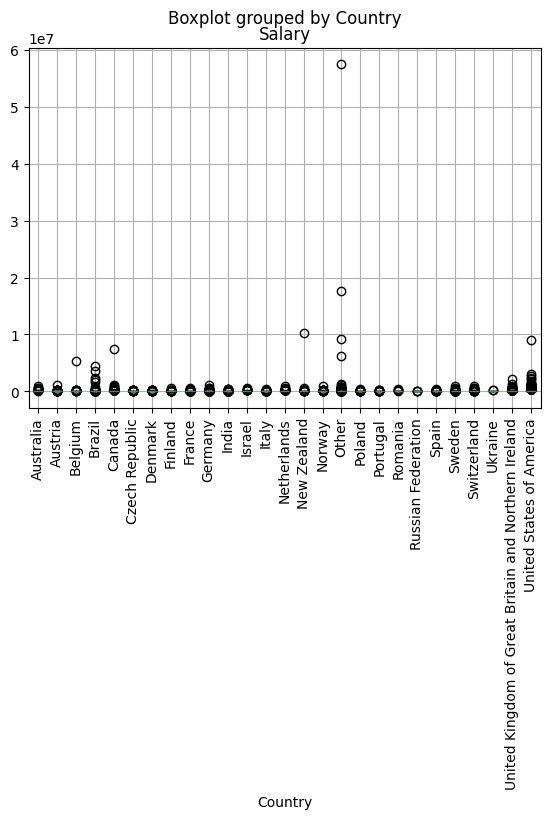

In [99]:
df.boxplot("Salary", "Country")
plt.xticks(rotation = 90)
plt.show()

In [100]:
df = df[df["Country"] != "Other"]

In [101]:
df["YearsCodePro"].unique()

array(['9', '23', '7', '21', '3', '15', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '8', '18', '30', '27', '17', '43', '1', '38', '33', '29',
       '22', '11', '34', '42', '26', '31', '36', '39', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [102]:
def clean_experience(x):
    if x == "More than 50 years":
        return 50
    if x == "Less than 1 year":
        return float(0.5)
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

In [103]:
df["YearsCodePro"].unique()

array([ 9. , 23. ,  7. , 21. ,  3. , 15. ,  0.5, 10. ,  2. ,  6. , 14. ,
        5. , 19. , 13. , 16. , 28. , 24. , 25. , 12. ,  4. , 20. ,  8. ,
       18. , 30. , 27. , 17. , 43. ,  1. , 38. , 33. , 29. , 22. , 11. ,
       34. , 42. , 26. , 31. , 36. , 39. , 40. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

In [104]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [105]:
# def clean_edlevel(x):
#     if "Professional degree" in x:
#         return "Post grad"
#     return

# df["EdLevel"] = df["EdLevel"].apply(clean_edlevel)

In [106]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [107]:
from sklearn.preprocessing import LabelEncoder
le_EdLevel = LabelEncoder()
df["EdLevel"] = le_EdLevel.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([1, 6, 2, 4, 0, 5, 3, 7])

In [108]:
#similarly for other columns to number them LabelEncoder() is used
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])
df["Country"].unique()

array([25, 24,  7,  0, 13,  9, 21,  8, 20,  3, 17, 12,  4, 22, 10, 19,  1,
       15,  2,  6, 11, 23, 16, 18,  5, 14])

In [109]:
x = df.drop("Salary", axis = 1)
y = df["Salary"]

In [110]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [111]:
pred = linear_reg.predict(x)

In [112]:
from sklearn.metrics import mean_squared_error, median_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, pred))

In [113]:
error #the error is pretty high so we have to try a different model as this doesnt seem to suit

126919.03145834756

In [114]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(x, y.values)

DecisionTreeRegressor(random_state=0)

In [115]:
error = np.sqrt(mean_squared_error(y, pred))
print("${:,.02f}".format(error))

$126,919.03


In [116]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth":max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [117]:
regressor = gs.best_estimator_
regressor.fit(x, y.values)
pred = regressor.predict(x)
error = np.sqrt(mean_squared_error(y, pred))
print("${:,.02f}".format(error))

$122,177.79


In [118]:
x

,Country,EdLevel,YearsCodePro
1,25,1,9.0
2,25,1,23.0
3,25,1,7.0
5,24,6,21.0
6,25,6,3.0
...,...,...,...
89157,4,1,12.0
89158,21,1,8.0
89162,3,2,24.0
89167,10,1,2.0


In [125]:
x = np.array([["United States of America", "Master's degree", 15]])
x

array([['United States of America', "Master's degree", '15']],
      dtype='<U24')

In [126]:
x[:, 0] = le_country.transform(x[:,0])
x[:, 1] = le_EdLevel.transform(x[:,1])
x = x.astype(float)
x

ValueError: y contains previously unseen labels: "Master's degree"

In [ ]:
import pickle

In [ ]:
data = {"model":regressor, "le_country":le_country, "le_EdLevel":le_EdLevel}
with open ("saved_steps.pkl", "wb") as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle. load(file)

regressor_loaded=data["model"]
le_country = data["le_country"]
le_EdLevel = data["le_EdLevel"]

In [ ]:
y_pred = regressor_loaded.predict(x)
y_pred

c:\Users\Prajin\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([195331.42489974])